In [33]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akankshaankam/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
data = pd.read_csv('data4.csv', header = None)
data.columns = ['ID', 'Topic', 'Sentiment', 'text']
data

,ID,Topic,Sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [26]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Lowercase
        text = nltk.word_tokenize(text)  # Tokenization
        # Additional preprocessing can be added here
        return ' '.join(text)
    else:
        return ''

In [28]:
data['text'] = data['text'].apply(preprocess_text)
data['text']

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: text, Length: 74682, dtype: object

In [29]:
# Sentment Analysis

In [32]:
sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment']

0       -0.6908
1       -0.6908
2       -0.6908
3       -0.6908
4       -0.6908
          ...  
74677    0.0772
74678   -0.2960
74679   -0.2960
74680    0.0772
74681    0.3687
Name: sentiment, Length: 74682, dtype: float64

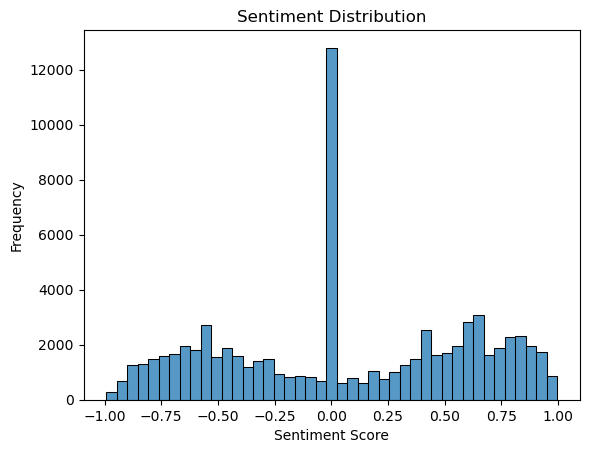

In [34]:
sns.histplot(data['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

A high frequency at zero on the x-axis indicates that there are many occurrences of a sentiment score close to zero in your dataset. In the context of sentiment analysis, a score of zero usually indicates a neutral sentiment, neither positive nor negative.